In [44]:
#importing libraries
# male = 1, female = 0
# Potential Biases: more males than females, right skewed

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from itertools import repeat
from sklearn.model_selection import train_test_split


In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/plmkonist/AI4all/main/heart.csv')

In [47]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
clean_data = data.drop(columns =['restecg', 'slp', 'oldpeak', 'output'])
Y = data.output

In [56]:
clean_data.head()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [61]:
clean_data.head()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall
0,63,1,3,145,233,1,150,0,0,1
1,37,1,2,130,250,0,187,0,0,2
2,41,0,1,130,204,0,172,0,0,2
3,56,1,1,120,236,0,178,0,0,2
4,57,0,0,120,354,0,163,1,0,2


In [57]:
clean_data.describe()

,age,sex,cp,trtbps,chol,fbs,thalachh,exng,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,149.646865,0.326733,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,22.905161,0.469794,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,202.000000,1.000000,4.000000,3.000000


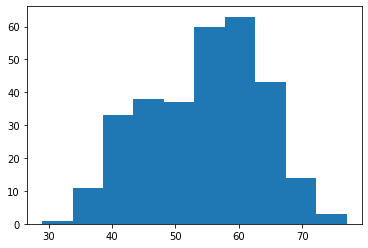

In [58]:
X = clean_data.iloc[:, 0]
plt.hist(X)
plt.show()

Potential Bias: Our data is skewed to the right

In [59]:
# data['output'] = data['output'].astype(str)

In [60]:
# Assigning training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

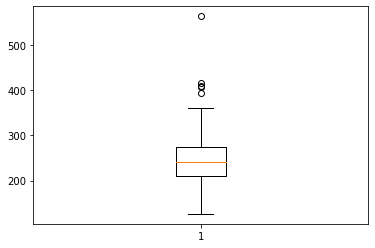

In [67]:
plt.boxplot(data.chol)
plt.show()

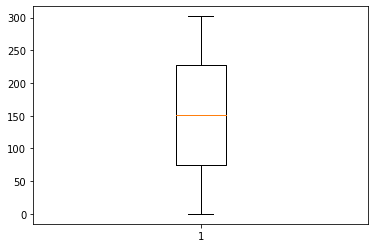

In [78]:
clean_data['chol'] = data['chol'].astype(float)
clean_data.chol = np.where(clean_data.chol < 380)
plt.boxplot(clean_data.chol)
plt.show()